In [2]:
from src.main import *
import matplotlib.pyplot as plt
import numpy as np


In [3]:
report_11 = Report(
    'src/data/format-2011-world-copper-2063-trade.json', '2011', 2)
report_12 = Report(
    'src/data/format-2012-world-copper-2063-trade.json', '2012', 2)
report_13 = Report(
    'src/data/format-2013-world-copper-2063-trade.json', '2013', 2)
report_14 = Report(
    'src/data/format-2014-world-copper-2063-trade.json', '2014', 2)
report_15 = Report(
    'src/data/format-2015-world-copper-2063-trade.json', '2015', 2)

report_16 = Report(
    'src/data/format-2016-world-copper-2063-trade.json', '2016', 2)
report_17 = Report(
    'src/data/format-2017-world-copper-2063-trade.json', '2017', 2)
report_18 = Report(
    'src/data/format-2018-world-copper-2063-trade.json', '2018', 2)
report_19 = Report(
    'src/data/format-2019-world-copper-2063-trade.json', '2019', 2)
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)


In [4]:
reports = [
    report_11, report_12, report_13, report_14, report_15,
    report_16, report_17, report_18, report_19, report_20
]


def batch_fn(inject, **args):
    for report in reports:
        inject(report, **args)


In [5]:
[len(i) for i in nx.weakly_connected_components(report_11.G)]

[121]

In [7]:
def get_network_scale_review():
    lines = []
    for report in reports:
        lines.append({
            'year': report.name,
            'nodes': len(report.net._G.nodes),
            'scale of connetct components': [len(i) for i in nx.weakly_connected_components(report.net._G)]
        })
    
    print(pd.DataFrame(lines))

get_network_scale_review()



   year  nodes scale of connetct components
0  2011    124                     [121, 3]
1  2012    125                        [125]
2  2013    122                        [122]
3  2014    122                     [120, 2]
4  2015    165                        [165]
5  2016    114                        [114]
6  2017    127                  [123, 2, 2]
7  2018    123                        [123]
8  2019    114                     [112, 2]
9  2020    108                        [108]


In [8]:
def view_subgraph():
    for report in reports:
        subgraphs = [g for g in nx.weakly_connected_components(report.G)]
        if len(subgraphs) > 1:
            for i in range(1, len(subgraphs)):
                print(subgraphs[i])

view_subgraph()

In [9]:
def get_network_indexs():
    lines = []
    for report in reports:
        lines.append({
            'year': report.name,
            'nodes': len(report.G.nodes),
            'average degree': np.array(list(dict(report.G.degree).values())).mean(),
            'average strength': np.array(list(dict(report.G.degree(weight="weight")).values())).mean()/1000000,
            'export': np.array(list(dict(report.G.degree(weight="weight")).values())).sum()/1000000,
            'clustering': nx.average_clustering(report.G),
            'scale of connetct components': [len(i) for i in nx.weakly_connected_components(report.G)]
        })
    
    return lines

lines = get_network_indexs()
pd.DataFrame(lines)


,year,nodes,average degree,average strength,export,clustering,scale of connetct components
0,2011,121,10.528926,468.318660,56666.557822,0.283096,[121]
1,2012,125,10.608000,284.408779,35551.097399,0.249209,[125]
2,2013,122,11.245902,345.209687,42115.581806,0.290678,[122]
3,2014,120,11.083333,362.044405,43445.328584,0.306504,[120]
4,2015,165,10.642424,283.454647,46770.016802,0.443648,[165]
5,2016,114,11.543860,511.231983,58280.446105,0.265003,[114]
6,2017,123,10.813008,504.571084,62062.243284,0.288295,[123]
7,2018,123,10.634146,524.716814,64540.168162,0.276396,[123]
8,2019,112,11.500000,572.715621,64144.149510,0.310430,[112]
9,2020,108,9.722222,647.545813,69934.947804,0.284519,[108]


In [10]:
"""
for report in reports:
    write_to_excel(report.data_overview(), 'excel/' +
                   report.name + '_copper_2063_trade.xlsx')
"""


"\nfor report in reports:\n    write_to_excel(report.data_overview(), 'excel/' +\n                   report.name + '_copper_2063_trade.xlsx')\n"

In [11]:
pd.DataFrame(report_11.nodes)


,name,code,E,IS,OS,DC,BC,CC
0,China,156,1,3,6,1,1,1
1,Rep. of Korea,410,2,2,6,4,6,2
2,Peru,604,3,6,2,4,6,4
3,Australia,36,4,6,3,5,6,4
4,Chile,152,4,6,2,4,6,3
...,...,...,...,...,...,...,...,...
119,New Zealand,554,6,6,6,6,6,5
120,Madagascar,450,6,6,6,6,6,5
121,Honduras,340,6,6,6,6,6,4
122,Nepal,524,6,6,6,6,6,5


In [12]:
pd.DataFrame(report_11.net.getAdjacencyEntropies(report_11.G).items())


,0,1
0,8,2.819617e-02
1,156,2.378508e+01
2,792,1.622778e+00
3,12,1.179018e-04
4,826,1.829102e-01
...,...,...
116,52,3.976108e-07
117,400,4.324522e-05
118,780,4.314910e-06
119,862,6.975322e-08


In [13]:
# report_20.net.draw()



In [14]:
overview = report_11.data_overview()
# write_to_excel(overview, 'excel/t1_data_overview_16.xlsx')
overview


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
1,8,Albania,156,China,Export,13244524,10912650.0,10912650.0
2,8,Albania,792,Turkey,Export,28169884,20568660.0,20568660.0
3,12,Algeria,156,China,Export,550,105.0,105.0
4,24,Angola,826,United Kingdom,Import,51,1.0,1.0
5,32,Argentina,68,Bolivia (Plurinational State of),Import,288092,5310000.0,5310000.0
...,...,...,...,...,...,...,...,...
841,894,Zambia,757,Switzerland,Export,3228272,3738141.0,3738141.0
842,894,Zambia,784,United Arab Emirates,Export,40,1.0,1.0
843,894,Zambia,826,United Kingdom,Export,1193,862.0,862.0
844,894,Zambia,842,USA,Import,902,7.0,7.0


In [15]:
def get_bigest_BC(G):
    betweenness_centralities = nx.betweenness_centrality(G)
    return sorted(G.nodes, key=lambda node: betweenness_centralities[node])[-1]


In [16]:
def get_bigest_DC(G):
    degree_centralities = nx.degree_centrality(G)
    return sorted(G.nodes, key=lambda node: degree_centralities[node])[-1]


In [17]:
def get_bigest_CC(G):
    closeness_centralities = nx.closeness_centrality(G)
    return sorted(G.nodes, key=lambda node: closeness_centralities[node])[-1]

In [18]:
def get_bigest_IS(G):
    in_strengths = G.in_degree(weight="weight")
    return sorted(G.nodes, key=lambda node: in_strengths[node])[-1]

In [19]:
def get_bigest_OS(G):
    out_strengths = G.out_degree(weight="weight")
    return sorted(G.nodes, key=lambda node: out_strengths[node])[-1]

In [20]:
def get_bigest_E(G):
    Es = Net.getAdjacencyEntropies(G)

    return sorted(G.nodes, key=lambda node: Es[node])[-1]

In [21]:
get_bigest_E(report_11.G)

156

In [22]:
def removeTest(report):

    fig, axes = plt.subplots()

    x = np.arange(len(report.G.nodes)) / len(report.G.nodes)

    y = Net.removeTest(report.G, to_remove=get_bigest_BC)
    axes.plot(x, y, label='BC')
    y = Net.removeTest(report.G, to_remove=get_bigest_DC)
    axes.plot(x, y, label='DC')
    y = Net.removeTest(report.G, to_remove=get_bigest_CC)
    axes.plot(x, y, label='CC')
    '''
    y = Net.removeTest(report.G, to_remove=get_bigest_IS)
    axes.plot(x, y, label='IS')
    y = Net.removeTest(report.G, to_remove=get_bigest_OS)
    axes.plot(x, y, label='OS')
    '''
    y = Net.removeTest(report.G, to_remove=get_bigest_E)
    axes.plot(x, y, label='E')

    '''
    indexs = ['BC', 'CC', 'DC', 'E']

    for index in indexs:

        sorted_nodes = sorted(
            report.nodes, key=lambda e: e[index], reverse=True)
        x = [item['code'] for item in sorted_nodes]
        y = report.net.removeTest(report.G, to_remove=)

        axes.plot(np.arange(len(x)+1), y, label=index)
    '''

    axes.legend()
    plt.show()


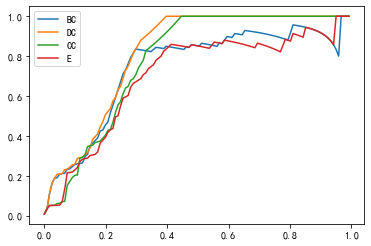

In [23]:
removeTest(report_11)


In [24]:
'''
removeTest(report_11)
removeTest(report_12)
removeTest(report_13)
removeTest(report_14)
removeTest(report_15)
removeTest(report_16)
removeTest(report_17)
removeTest(report_18)
removeTest(report_19)
removeTest(report_20)
'''

'\nremoveTest(report_11)\nremoveTest(report_12)\nremoveTest(report_13)\nremoveTest(report_14)\nremoveTest(report_15)\nremoveTest(report_16)\nremoveTest(report_17)\nremoveTest(report_18)\nremoveTest(report_19)\nremoveTest(report_20)\n'

In [25]:
'''
series = [item['code'] for item in report_11.net.sortedNodes]
y = report_11.net.removeTest(series)
'''



"\nseries = [item['code'] for item in report_11.net.sortedNodes]\ny = report_11.net.removeTest(series)\n"

In [26]:
nodes_sort_by_BC = sorted(report_11.nodes, key=lambda e: e['BC'], reverse=True)
series_BC = [item["code"] for item in nodes_sort_by_BC]

nodes_sort_by_DC = sorted(report_11.nodes, key=lambda e: e['DC'], reverse=True)
series_DC = [item["code"] for item in nodes_sort_by_DC]

nodes_sort_by_CC = sorted(report_11.nodes, key=lambda e: e['CC'], reverse=True)
series_CC = [item["code"] for item in nodes_sort_by_CC]


In [27]:
mat = np.zeros((len(reports), 10), dtype='int')
for i, report in enumerate(reports):
    nodes = report.net.sortedNodes[:10]
    mat[i, :] = [node['code'] for node in nodes]

nodes = mat.ravel()


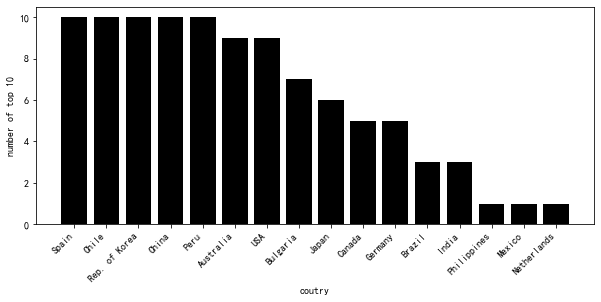

In [28]:
nodes_set = set(nodes)
ys = []
for n in nodes_set:
    ys.append((n, list(nodes).count(n)))
ys = sorted(ys, key=lambda item: item[1], reverse=True)
fig, axe = plt.subplots(figsize=(10,4))
axe.bar(np.arange(len(ys)), [item[1] for item in ys], color="k")
x_labels = [report_11.net.countries[str(item[0])] for item in ys]
axe.set_xticks(np.arange(len(ys)))
axe.set_xticklabels(x_labels, rotation="45", ha="right", va="top")
axe.set_xlabel('coutry')
axe.set_ylabel('number of top 10')

plt.savefig('c8.svg', format="svg", bbox_inches="tight")
plt.show()


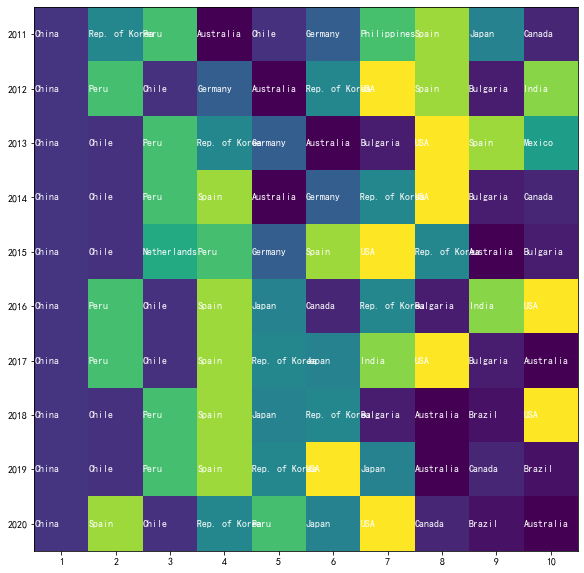

In [29]:
def draw_entropy_map(slice=10):
    # fig, axe = plt.subplots(1, 2, figsize=(20, 10))
    fig, axe = plt.subplots(figsize=(20, 10))
    axe = [axe]

    for i in range(len(reports)):
        for j in range(slice):
            axe[0].text(j-0.5, i, report.net.countries[str(
                mat[i, j])], ha="left", va="center", color="w")
    axe[0].imshow(mat)
    axe[0].set_xticks(np.arange(slice))
    axe[0].set_yticks(np.arange(len(reports)))
    axe[0].set_xticklabels(np.arange(1, slice+1))
    axe[0].set_yticklabels([report.name for report in reports])

    '''
    nodes = np.array(list(set(mat.ravel()))).reshape(-1, 2)

    sep = int(len(nodes) / 2)
    axe[1].imshow(nodes[0:sep])
    '''

    plt.savefig('c7.svg', format="svg", bbox_inches="tight")
    plt.show()


draw_entropy_map()


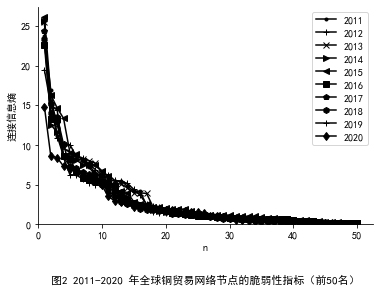

In [30]:
def draw_entropy_plots(slice=None):
    fig, axes = plt.subplots()
    y_label = "连接信息熵"

    line_styles = [
        '.-', '+-', 'x-', '>-', '<-',
        's-', 'p-', 'h-', '+-', 'd-'
    ]

    for i, report in enumerate(reports):
        nodes = report.net.sortedNodes
        x = np.arange(len(nodes)) + 1
        y = [node['E'] for node in nodes]
        axes.spines['right'].set_visible(False)
        axes.spines['top'].set_visible(False)
        if slice is None:
            axes.plot(x, y, line_styles[i], label=report.name, color="k")
        else:
            axes.plot(x[slice[0]: slice[1]], y[slice[0]: slice[1]],
                      line_styles[i], label=report.name, color="k")

    axes.legend()
    axes.set_xlabel('n')
    axes.set_ylabel(y_label)
    axes.set_xlim(0, None)
    axes.set_ylim(0, None)

    plt.title('图2 2011-2020 年全球铜贸易网络节点的脆弱性指标（前50名）', y=-0.3, size=11)

    plt.savefig('c2.svg', format="svg", bbox_inches="tight")
    plt.show()



draw_entropy_plots([0, 50])


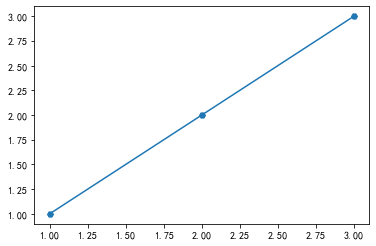

In [31]:
x = [1,2,3]
y = [1,2,3]
plt.plot(x,y, 'H-')
plt.show()

In [32]:
table_entropy_cluster = show_cluster_list(reports)
table_entropy_cluster
# write_to_excel(table_entropy_cluster, 'excel/entropy_cluster.xlsx')


,code,code,code,code,code,code,code,code,code,code
E,,,,,,,,,,
1,156,156,156,156,156,156,156,156,156,156
2,410,604,"152,604","152,604",528,"604,152",604,"152,604","152,604","152,724"
3,604,"152,276,36","276,410,100,36,842,724","724,36,276,410,842",152,"724,392",152,724,724,"410,604,842,392"
4,"36,152,276,608,724","410,842,724,100",484,"100,124,392",604,"124,410,100,842,699,36,276","724,410,392,699,842,100,36","392,410,100,36,76","842,410,392,36,124,76,100","124,76,36"
5,"842,124,392,100,484,710,598,699","699,124,392,710,484,76,608,643","699,124,392,76,710,894,608","699,76,710","276,724,842,410,36,100,124","76,246,484,360,等11项","124,276,76,484,608,710,246,643","842,276,124","699,484,276,398,710,360","276,180,484,360,等16项"
6,"76,246,792,51,等108项","398,792,894,752,等108项","398,792,528,826,等105项","608,484,894,398,等108项","76,699,392,710,等154项","834,56,620,792,等91项","51,180,894,360,等109项","699,484,360,608,等111项","51,792,246,643,等97项","608,516,688,642,等82项"


In [33]:
nodes_attribute_20 = report_20.show_nodes_attribute()
nodes_attribute_20
# write_to_excel(nodes_attribute_20, 'excel/t2_attributes_2020.xlsx')


,code,name,IS,OS,DC,BC,CC,E
0,156,China,1,6,1,1,1,1
1,152,Chile,6,1,4,6,4,2
2,724,Spain,4,5,2,3,2,2
3,410,Rep. of Korea,3,6,3,5,2,3
4,604,Peru,6,2,4,5,4,3
...,...,...,...,...,...,...,...,...
103,251,France,6,6,4,5,2,6
104,218,Ecuador,6,6,6,6,3,6
105,784,United Arab Emirates,6,6,6,6,4,6
106,807,North Macedonia,6,6,6,6,6,6


In [34]:
for report in reports:
    report.set_attribute_probability()


In [35]:
for report in reports:
    # report.show_dt_accuracy()
    # report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')
    for _report in reports:
        res = ID3.checkPrecesion(
            _report.nodes, report.decision_tree) / len(_report.nodes)
        print(report.name + " - " + _report.name + ": " + str(res))


2011 - 2011: 1.0
2011 - 2012: 0.824
2011 - 2013: 0.7049180327868853
2011 - 2014: 0.6967213114754098
2011 - 2015: 0.40606060606060607
2011 - 2016: 0.7368421052631579
2011 - 2017: 0.7480314960629921
2011 - 2018: 0.7317073170731707
2011 - 2019: 0.7368421052631579
2011 - 2020: 0.7129629629629629
2012 - 2011: 0.9112903225806451
2012 - 2012: 0.992
2012 - 2013: 0.9098360655737705
2012 - 2014: 0.9180327868852459
2012 - 2015: 0.9212121212121213
2012 - 2016: 0.8596491228070176
2012 - 2017: 0.889763779527559
2012 - 2018: 0.9105691056910569
2012 - 2019: 0.868421052631579
2012 - 2020: 0.7962962962962963
2013 - 2011: 0.9032258064516129
2013 - 2012: 0.896
2013 - 2013: 1.0
2013 - 2014: 0.9262295081967213
2013 - 2015: 0.9393939393939394
2013 - 2016: 0.8157894736842105
2013 - 2017: 0.889763779527559
2013 - 2018: 0.9349593495934959
2013 - 2019: 0.8771929824561403
2013 - 2020: 0.7962962962962963
2014 - 2011: 0.8790322580645161
2014 - 2012: 0.912
2014 - 2013: 0.9098360655737705
2014 - 2014: 1.0
2014 - 2015

In [36]:
Es = get_all_E(reports)

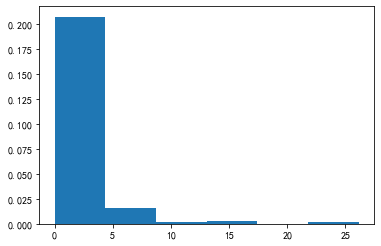

In [37]:
fig, axes = plt.subplots()
n, bins, pathces = axes.hist(Es, 6, density=True)
plt.show()

In [38]:
for report in reports:
    decision_list = pd.DataFrame(report.decision_list)[
        report.attribute_names + ['label', 'p']]\
        .sort_values('p')\
        .reset_index(drop=True)

    print(decision_list[-5:-1])

#write_to_excel(decision_list_20, 'excel/t4_decision_list_2020.xlsx')


KeyError: "['BC'] not in index"

In [ ]:
decision_attribute_distribute = get_decision_attribute_distribute(reports)
# write_to_excel(decision_attribute_distribute, 'excel/t5_decision_attribute_distribute.xlsx')
decision_attribute_distribute


In [ ]:
for report in reports:
    report.decision_probability_bar()


In [ ]:
show_hierarchical_risk_bar(reports)


NameError: name 'show_hierarchical_risk_bar' is not defined